<a href="https://colab.research.google.com/github/mincfranc/Code-Notes/blob/drafts/Project6_MinervaFranco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 6

#Problem Definition

This project is a supervised classification problem, as it involves training a model on labeled data (images of cats and dogs) to predict the category of new, unseen images.

The task highlights the use of deep learning to automate feature extraction and solve a traditionally challenging computer vision problem.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import requests
from io import BytesIO

!pip install Pillow
from PIL import Image

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input
from keras.utils import plot_model


from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
url_X = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/X.pickle'

In [3]:
!curl -O {url_X}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  237M  100  237M    0     0  60.4M      0  0:00:03  0:00:03 --:--:-- 60.4M


```
Run 1
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  237M  100  237M    0     0  46.0M      0  0:00:05  0:00:05 --:--:-- 48.3M

Run 2
 % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  237M  100  237M    0     0  41.5M      0  0:00:05  0:00:05 --:--:-- 46.0M
```

In [4]:
# @title
data_X = pd.read_pickle(url_X)
data_X

array([[[[ 95],
         [ 94],
         [ 98],
         ...,
         [170],
         [172],
         [171]],

        [[ 92],
         [ 91],
         [ 95],
         ...,
         [170],
         [172],
         [171]],

        [[ 89],
         [ 91],
         [ 92],
         ...,
         [165],
         [169],
         [169]],

        ...,

        [[ 84],
         [ 76],
         [ 73],
         ...,
         [135],
         [164],
         [154]],

        [[ 82],
         [ 79],
         [ 71],
         ...,
         [142],
         [134],
         [153]],

        [[ 80],
         [ 85],
         [ 85],
         ...,
         [151],
         [146],
         [138]]],


       [[[171],
         [154],
         [139],
         ...,
         [185],
         [187],
         [188]],

        [[146],
         [140],
         [129],
         ...,
         [187],
         [187],
         [188]],

        [[128],
         [132],
         [128],
         ...,
         [186],
         [

In [5]:
data_X.shape

(24946, 100, 100, 1)

In [6]:
type(data_X)

numpy.ndarray

In [7]:
url_y = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/y.pickle'

In [8]:
!curl -O {url_y}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 49948  100 49948    0     0   131k      0 --:--:-- --:--:-- --:--:--  131k


```
Run 1
% Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 49948  100 49948    0     0   227k      0 --:--:-- --:--:-- --:--:--  227k


Run 2
% Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 49948  100 49948    0     0   177k      0 --:--:-- --:--:-- --:--:--  177k
```

In [9]:
data_y = pd.read_pickle(url_y)
data_y

[0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,


In [10]:
len(data_y)

24946

In [11]:
type(data_y)

list

In [12]:
data_Xscaled = data_X / 255
data_Xscaled

array([[[[0.37254902],
         [0.36862745],
         [0.38431373],
         ...,
         [0.66666667],
         [0.6745098 ],
         [0.67058824]],

        [[0.36078431],
         [0.35686275],
         [0.37254902],
         ...,
         [0.66666667],
         [0.6745098 ],
         [0.67058824]],

        [[0.34901961],
         [0.35686275],
         [0.36078431],
         ...,
         [0.64705882],
         [0.6627451 ],
         [0.6627451 ]],

        ...,

        [[0.32941176],
         [0.29803922],
         [0.28627451],
         ...,
         [0.52941176],
         [0.64313725],
         [0.60392157]],

        [[0.32156863],
         [0.30980392],
         [0.27843137],
         ...,
         [0.55686275],
         [0.5254902 ],
         [0.6       ]],

        [[0.31372549],
         [0.33333333],
         [0.33333333],
         ...,
         [0.59215686],
         [0.57254902],
         [0.54117647]]],


       [[[0.67058824],
         [0.60392157],
         [0.54

In [13]:
data_Xscaled.shape

(24946, 100, 100, 1)

AxesImage(shape=(100, 100))


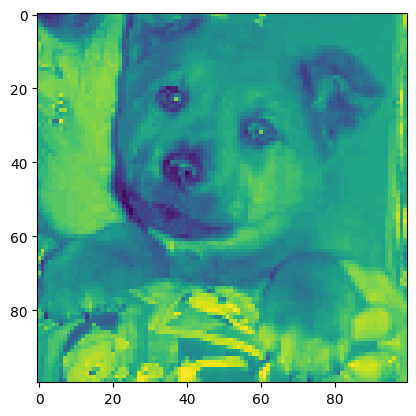

In [14]:
print(plt.imshow(data_Xscaled[11555]))

AxesImage(shape=(100, 100))


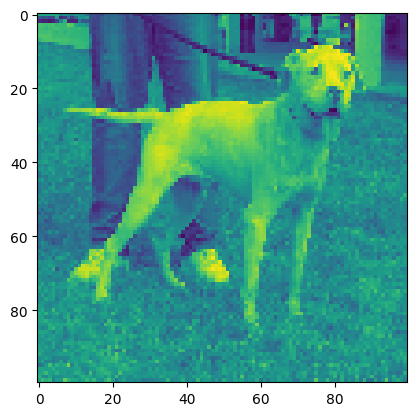

In [15]:
print(plt.imshow(data_Xscaled[8277]))

AxesImage(shape=(100, 100))


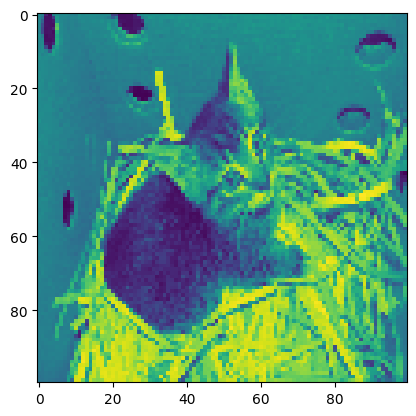

In [16]:
print(plt.imshow(data_Xscaled[2071]))

AxesImage(shape=(100, 100))


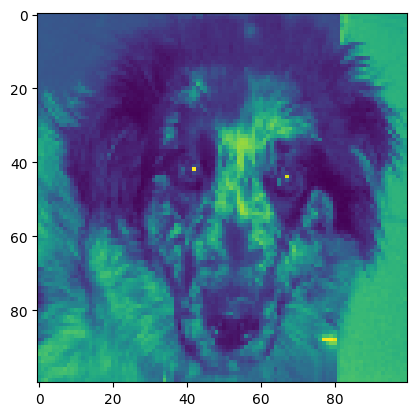

In [17]:
print(plt.imshow(data_Xscaled[23488]))

AxesImage(shape=(100, 100))


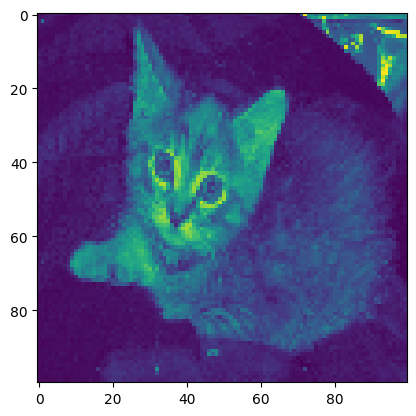

In [18]:
print(plt.imshow(data_Xscaled[927]))

In [19]:
print(data_y[927])
print(data_y[2071])
print(data_y[11555])
print(data_y[23488])
print(data_y[8277])

1
1
0
0
0


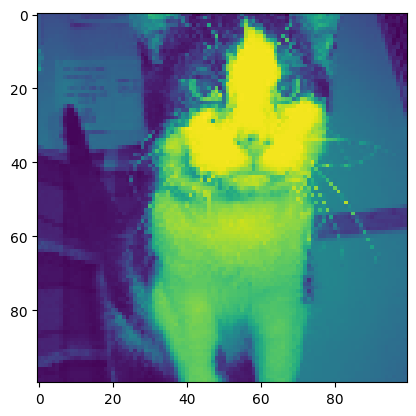

In [20]:
for c in range(444,485,10):
  plt.imshow(data_Xscaled[c])

In [21]:
# Subset Selection for Demonstration
subset_size = 1500
random_indices = np.random.choice(data_Xscaled.shape[0], size=subset_size, replace=False)
data_Xscaled_sub = data_Xscaled[random_indices]
data_y_sub = np.array(data_y)[random_indices]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data_Xscaled_sub, data_y_sub, test_size = 0.25, random_state = 37)

In [23]:
print(X_train.shape)
print(data_Xscaled_sub.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(data_y_sub.shape)

(1125, 100, 100, 1)
(1500, 100, 100, 1)
(375, 100, 100, 1)
(1125,)
(375,)
(1500,)


```
to make my model this is what i used:

# Subset Selection for Demonstration
subset_size = 1500
random_indices = np.random.choice(data_Xscaled.shape[0], size=subset_size, replace=False)
data_Xscaled_sub = data_Xscaled[random_indices]
data_y_sub = np.array(data_y)[random_indices]

X_train, X_test, y_train, y_test = train_test_split(data_Xscaled_sub, data_y_sub, test_size = 0.25, random_state = 37)


print(X_train.shape) (1125, 100, 100, 1)

print(data_Xscaled_sub.shape) (1500, 100, 100, 1)

print(X_test.shape)(375, 100, 100, 1)

print(y_train.shape) (1125,)

print(y_test.shape) (375,)

print(data_y_sub.shape) (1500,)
```

#Model

In [24]:
model = Sequential()

In [25]:
# # Define input layer using Input
model.add(Input(shape = X_train.shape[1:]))  # Get input shape from X_train

#to avoid error msg "/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.super().__init__(activity_regularizer=activity_regularizer, **kwargs)"

In [26]:
#Define input layer
model.add(
  Conv2D(
    name = "conv_input",
    filters = 8,
    kernel_size = (3,3),
    activation = 'relu',
  )
)

model.add(
    MaxPooling2D(pool_size=(2,2))
)

In [27]:
# Define second hidden layer
model.add(
  Conv2D(
    name = "hidden1",
    filters = 16,
    kernel_size = (3,3),
    activation = 'relu',
  )
)

model.add(
  MaxPooling2D(pool_size=(2,2))
)

In [28]:
# Define third hidden layer-- to improve/decrease loss
model.add(
  Conv2D(
    name = "hidden2",
    filters = 32,
    kernel_size = (3,3),
    activation = 'relu',
    )
)

model.add(
  MaxPooling2D(pool_size=(2,2))
)

In [29]:
# Flatten data to be used in output layer
model.add(
    Flatten()
)

# Define output layer
model.add(
  Dense(
    name = "output",
    units = 1,
    activation = 'sigmoid'
  )
)

In [30]:
# Compile model
model.compile(
  optimizer = 'adam',  # Tells Keras model how to learn using algorithm which updates weights of neural network during training
  loss = 'binary_crossentropy', #Tells Keras what to aim for using fx measuring diff bt predicted prollys & true labels in trying to predict cat or dog
  metrics = ['accuracy'], #Tells Keras how to judge its model's performance measured by its accuracy in making predictions (% correctly classified examples)
)

In [31]:
model.fit(X_train, y_train, epochs=12)

Epoch 1/12
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 141ms/step - accuracy: 0.4933 - loss: 0.6944
Epoch 2/12
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 174ms/step - accuracy: 0.5366 - loss: 0.6825
Epoch 3/12
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - accuracy: 0.6416 - loss: 0.6561
Epoch 4/12
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 185ms/step - accuracy: 0.6367 - loss: 0.6303
Epoch 5/12
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 183ms/step - accuracy: 0.6721 - loss: 0.6040
Epoch 6/12
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 182ms/step - accuracy: 0.6990 - loss: 0.5958
Epoch 7/12
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 189ms/step - accuracy: 0.7009 - loss: 0.5536
Epoch 8/12
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - accuracy: 0.7243 - loss: 0.5400
Epoch 9/12
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step - accuracy: 0.7307 - loss: 0.5478
Epoch 10/12
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 161ms/step - accuracy: 0.7745 - loss: 0.4927
Epoch 11/12
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - accuracy: 0.7589 - loss: 0.5158
Epoch 12/12
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 190ms/

```
Run 1, random_state 42, 3 layers (1 input, 1 hidden, 1 output), filters 32 & 64, binary_crossentropy loss, 8 epochs
Epoch 1/8
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 411ms/step - accuracy: 0.4928 - loss: 0.7341
Epoch 2/8
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 438ms/step - accuracy: 0.5476 - loss: 0.6891
Epoch 3/8
24/24 ━━━━━━━━━━━━━━━━━━━━ 22s 502ms/step - accuracy: 0.5638 - loss: 0.6735
Epoch 4/8
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 432ms/step - accuracy: 0.6928 - loss: 0.6242
Epoch 5/8
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 495ms/step - accuracy: 0.6858 - loss: 0.5834
Epoch 6/8
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 417ms/step - accuracy: 0.7379 - loss: 0.5506
Epoch 7/8
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 452ms/step - accuracy: 0.7716 - loss: 0.4994
Epoch 8/8
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 493ms/step - accuracy: 0.8112 - loss: 0.4557
<keras.src.callbacks.history.History at 0x7f9269974820>
```

```
Run 6
In sampling, changed random state= 37 (from 42).
4 layers (1 input, 2 hidden, 1 output)
Filters 32, 64, 82

Epoch 1/8
24/24 ━━━━━━━━━━━━━━━━━━━━ 14s 533ms/step - accuracy: 0.4477 - loss: 0.1826
Epoch 2/8
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 539ms/step - accuracy: 0.5055 - loss: 0.1728
Epoch 3/8
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 554ms/step - accuracy: 0.5845 - loss: 0.1682
Epoch 4/8
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 511ms/step - accuracy: 0.6448 - loss: 0.1569
Epoch 5/8
24/24 ━━━━━━━━━━━━━━━━━━━━ 22s 583ms/step - accuracy: 0.6842 - loss: 0.1513
Epoch 6/8
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 637ms/step - accuracy: 0.7082 - loss: 0.1431
Epoch 7/8
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 603ms/step - accuracy: 0.6981 - loss: 0.1419
Epoch 8/8
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 613ms/step - accuracy: 0.7850 - loss: 0.1219
<keras.src.callbacks.history.History at 0x7f52485b0dc0>

```

```
Run 9 binary_focus_crossentropy loss, 8 epochs, 4 layers
Epoch 1/12
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - accuracy: 0.7989 - loss: 0.1191
Epoch 2/12
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 187ms/step - accuracy: 0.7863 - loss: 0.1194
Epoch 3/12
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 140ms/step - accuracy: 0.7866 - loss: 0.1124
Epoch 4/12
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 186ms/step - accuracy: 0.7978 - loss: 0.1117
Epoch 5/12
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - accuracy: 0.8525 - loss: 0.0955
Epoch 6/12
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 185ms/step - accuracy: 0.8226 - loss: 0.0958
Epoch 7/12
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - accuracy: 0.8318 - loss: 0.0941
Epoch 8/12
36/36 ━━━━━━━━━━━━━━━━━━━━ 12s 181ms/step - accuracy: 0.8734 - loss: 0.0775
Epoch 9/12
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - accuracy: 0.8708 - loss: 0.0766
Epoch 10/12
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 186ms/step - accuracy: 0.9123 - loss: 0.0662
Epoch 11/12
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - accuracy: 0.9094 - loss: 0.0650
Epoch 12/12
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - accuracy: 0.9055 - loss: 0.0636
<keras.src.callbacks.history.History at 0x7f52d7aa7220>
```

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv_input (Conv2D)                  │ (None, 98, 98, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden1 (Conv2D)                     │ (None, 47, 47, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden2 (Conv2D)                     │ (None, 21, 21, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 1)                   │           3,201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,269 (106.52 KB)

 Trainable params: 9,089 (35.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 18,180 (71.02 KB)

In [33]:
import io
#1. Capture Summary output
# Capture the model summary output
def capture_summary(model):
    summary_capture = io.StringIO()
    model.summary(print_fn=lambda x: summary_capture.write(x + '\n'))
    summary_string = summary_capture.getvalue()
    summary_capture.close()
    return summary_string

#2. Process Summary string
# Get the summary string
summary_string = capture_summary(model)

# Split the summary string into lines
lines = summary_string.split('\n')

# Extract headers and data
headers = lines[3].split()[1:-1]  # Extract headers from the 4th line
data = []
for line in lines[5:-4]:  # Extract data from the 6th line to the 4th line from the end
    row = line.split()[1:-1]  # Extract data elements from each row
    if len(row) == len(headers):  # Only include rows with data for all headers
        data.append(row)

#3. Create DataFrame
# Create a pandas DataFrame
summary_df = pd.DataFrame(data, columns=headers)

#4. Save to File
# Save to CSV or Excel
summary_df.to_csv('model_summary.csv', index=False)  # Save as CSV
# df.to_excel('model_summary.xlsx', index=False)  # Save as Excel (requires openpyxl)

```
Run 1
Model: "functional_13"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 100, 100, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_input (Conv2D)                  │ (None, 98, 98, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden1 (Conv2D)                     │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 33856)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 1)                   │          33,857 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘
 Total params: 158,021 (617.27 KB)
 Trainable params: 52,673 (205.75 KB)
 Non-trainable params: 0 (0.00 B)
 Optimizer params: 105,348 (411.52 KB)
 ```

```
Run 5 Compiled model with loss = 'binary_focal_crossentropy'


Model: "sequential"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv_input (Conv2D)                  │ (None, 98, 98, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden1 (Conv2D)                     │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden2 (Conv2D)                     │ (None, 21, 21, 82)          │          47,314 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 82)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 1)                   │           8,201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘
 Total params: 222,995 (871.08 KB)
 Trainable params: 74,331 (290.36 KB)
 Non-trainable params: 0 (0.00 B)
 Optimizer params: 148,664 (580.72 KB)
```

In [34]:
# Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.7003 - loss: 0.6223
Test Loss: 0.5732
Test Accuracy: 0.7227


```
Run 1
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 224ms/step - accuracy: 0.6191 - loss: 0.6985
Test Loss: 0.7023
Test Accuracy: 0.6160
```

```
Run 2
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.6240 - loss: 0.6830
Test Loss: 0.6785
Test Accuracy: 0.6280
```

```
Run 3
Added a third layer and changed filters in 2nd layer=32, 3rd layer= 64
```

```
Run 4
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.6510 - loss: 0.6592
Test Loss: 0.6958
Test Accuracy: 0.6400
```

```
Run 5  (Loss = 'binary_focal_crossentropy' and 3 layers)
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 195ms/step - accuracy: 0.6279 - loss: 0.1854
Test Loss: 0.1779
Test Accuracy: 0.6440
```

```
Run 6 (same as 5 & changed random state= 37 in sampling)
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 208ms/step - accuracy: 0.6794 - loss: 0.1500
Test Loss: 0.1552
Test Accuracy: 0.6613
```

```
Run 7 Decreased filters to 16, 32, 48
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.6445 - loss: 0.1948
Test Loss: 0.1838
Test Accuracy: 0.6667
```

```
Run 8 Decreased filters to 8, 16, 32
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.6545 - loss: 0.1583
Test Loss: 0.1538
Test Accuracy: 0.6800
```

```
Run 9 Increased epochs to 12
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.6815 - loss: 0.2208
Test Loss: 0.2033
Test Accuracy: 0.6933
```

```
Run 10 back to binary_crossentropy, random state 37, 4 layers, 8, 16, 32 and 12 epochs
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.6739 - loss: 0.6105
Test Loss: 0.6022
Test Accuracy: 0.6747
```

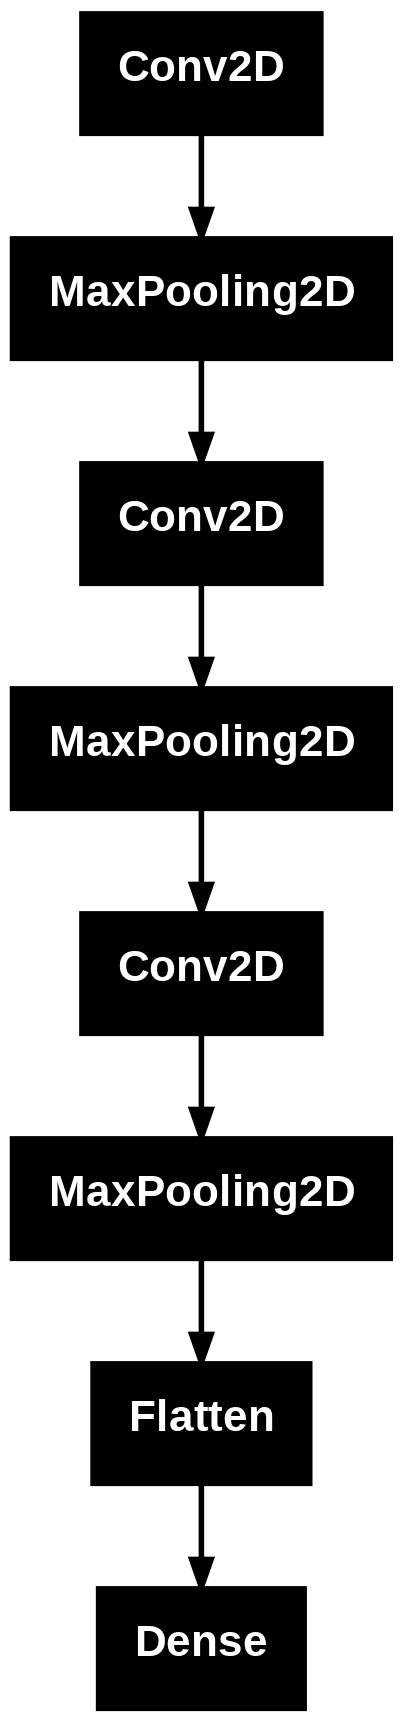

In [35]:
# @title Plot model
plot_model(model)

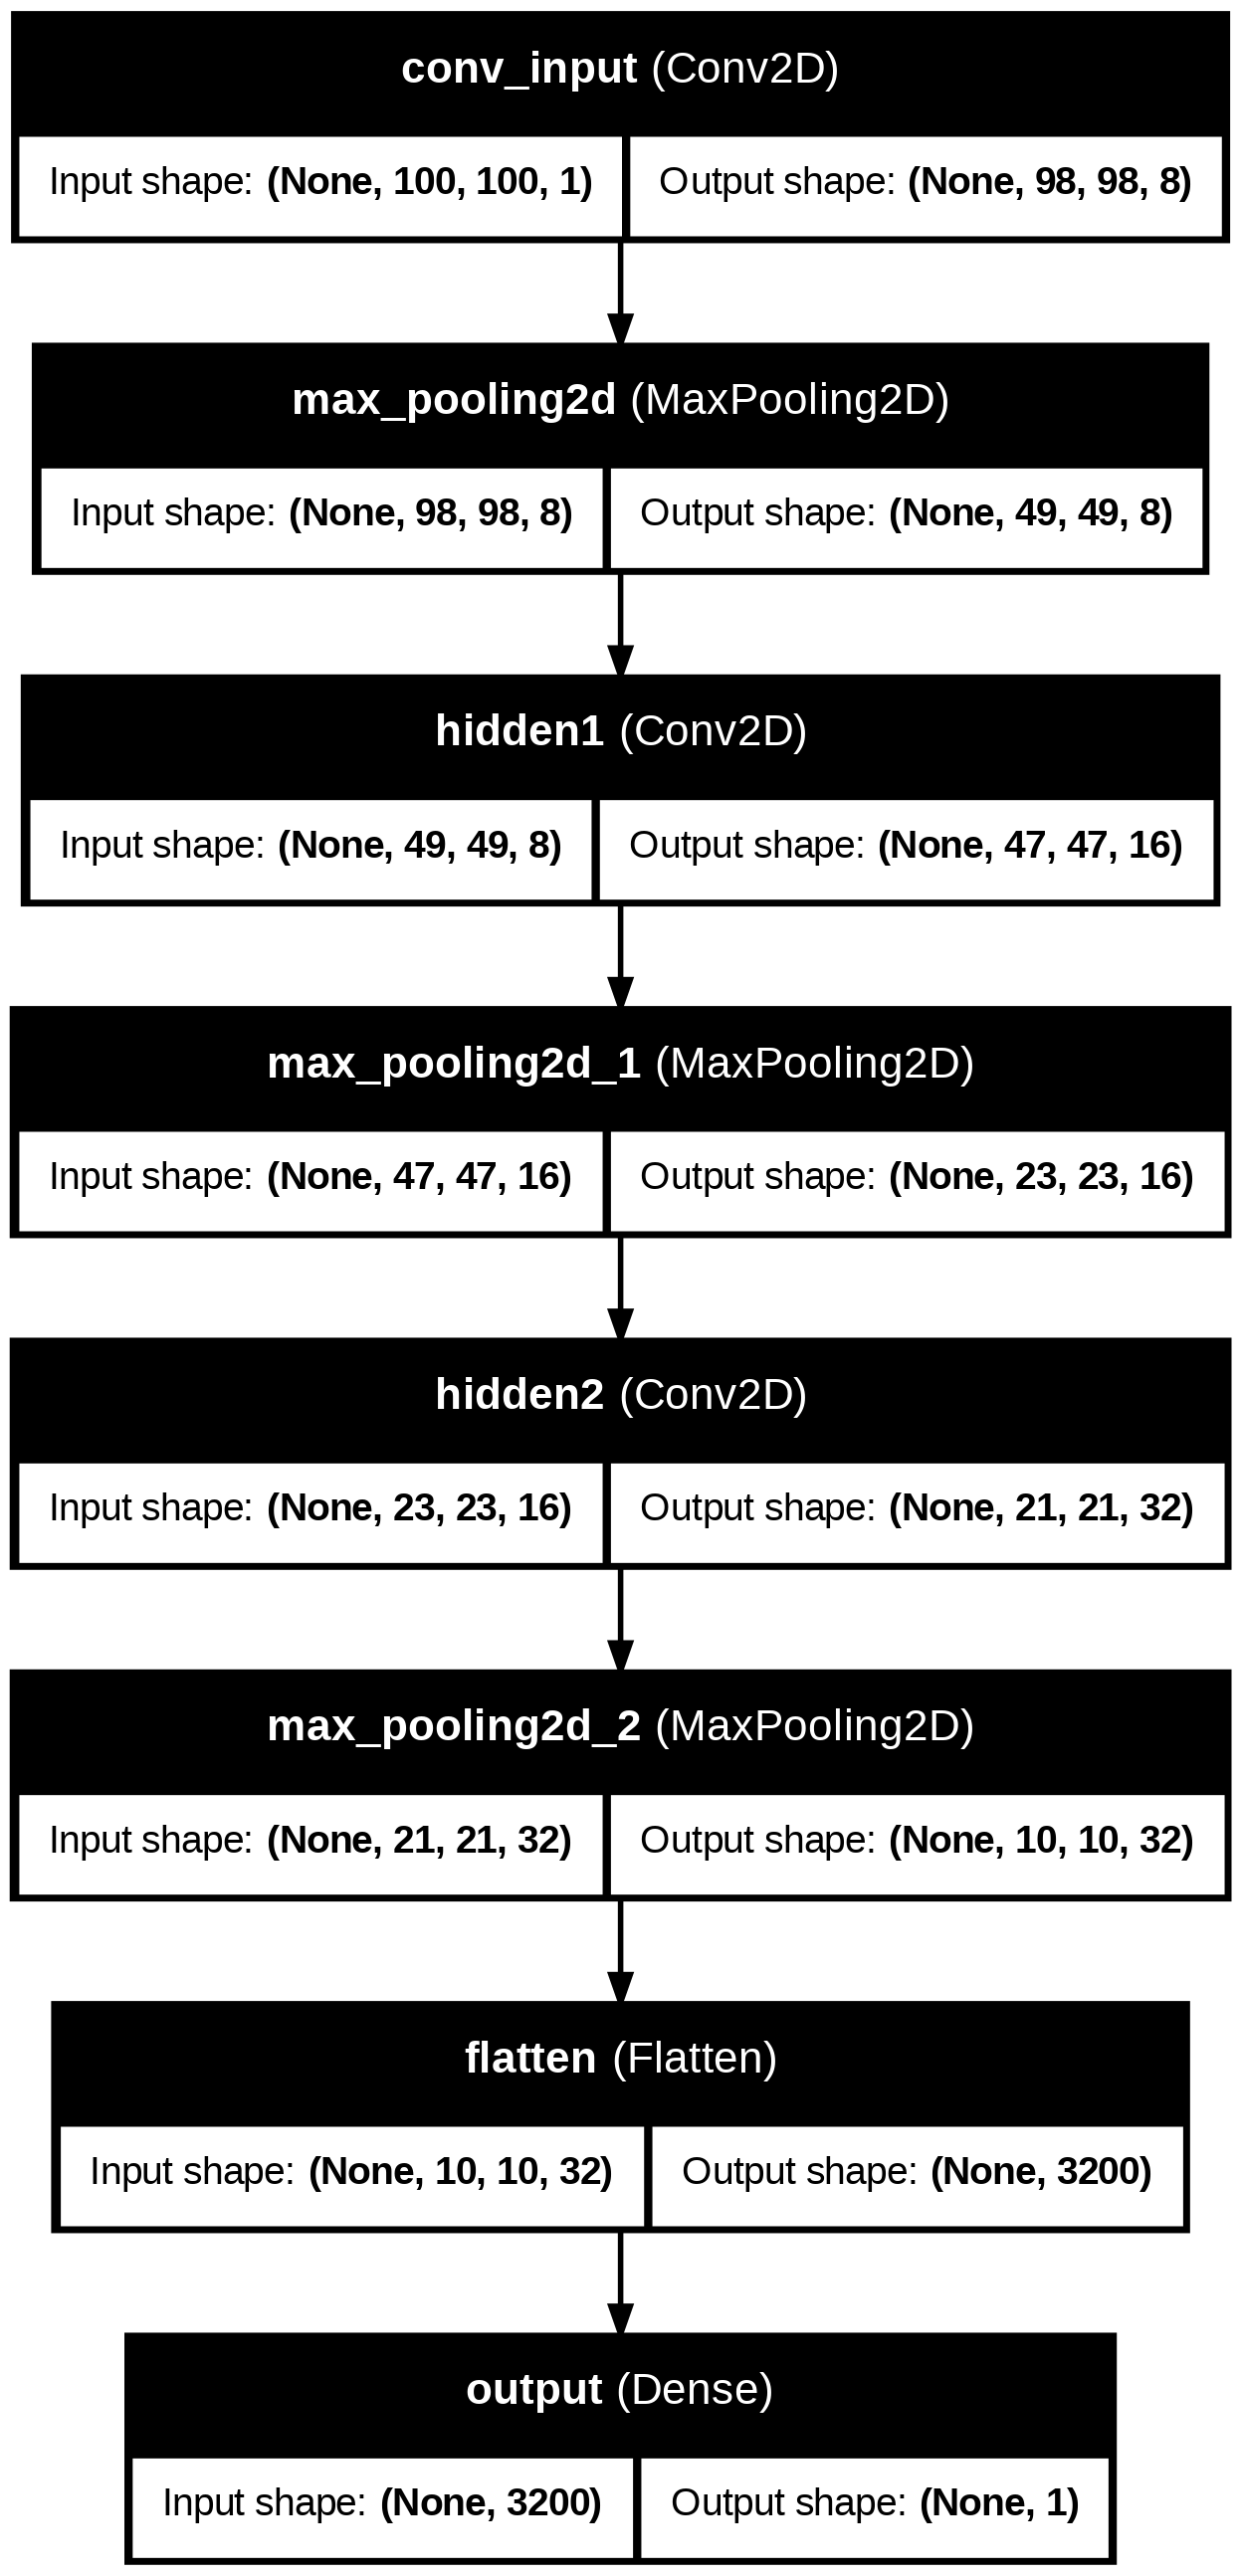

In [36]:
plot_model(model, to_file='modelP6_1.png', show_shapes=True, show_layer_names=True)

In [37]:
# make predictions based on testing set
predictions = model.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


In [38]:
predictions.shape

(375, 1)

* Define a function that will read in a new image and convert it to a 4 dimensional array of pixels (ask the instructor for help with this). Hint: numpy.reshape

In [39]:
# image_path = r"C:\Users\minef\Downloads\IMG_7525.jpg"

# # or image_path = /content/modelP6_1.png

In [53]:
def image_to_4d_array_(image_path, target_size):
    """
    Reads an image from the specified path, resizes it, and converts it into a 4D array of pixels.

    Parameters:
        image_path (str): Path to the image file.
        target_size (tuple): Desired size of the image (height, width).

    Returns:
        numpy.ndarray: A 4-dimensional array representing the image.
    """
    try:
        # Open and resize the image
        image = Image.open(image_path).resize(target_size)

        # Convert image to NumPy array and normalize
        img_array = np.array(image) / 255.0

        # Add an extra dimension to make it 4D (batch_size x height x width x channels)
        img_4d = np.expand_dims(img_array, axis=0)
        return img_4d
    except Exception as e:
        print(f"Error processing image: {e}")
        return None


* Use the function defined above to read in the dog.jpg image that is saved in the AWS S3 bucket.

In [41]:
image_url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg"
image_path = "dog_1.jpg"

In [43]:
# Function to download the image from a URL
def download_image(url, save_path):
    response = requests.get(url)
    if response.status_code == 200:
        img = Image.open(BytesIO(response.content))
        img.save(save_path)
        print(f"Image downloaded successfully: {image_path}")
    else: # This else statement should be indented at the same level as the if statement
        print(f"Failed to download image. Status code: {response.status_code}")

In [44]:
# Download the image
download_image(image_url, image_path)

Image downloaded successfully: dog_1.jpg


* Use the neural network you created to predict whether the image is a dog or a cat.

In [54]:
# Updated definition of image_to_array preprocess function to reshape dog image
def image_to_4d_array(image_path, target_size=(224, 224)):
    img = Image.open(image_path)
    img = img.resize(target_size)  # Resize to target dimensions
    img_array = np.array(img)  # Convert to a NumPy array
    if img_array.ndim == 2:  # If grayscale, add a channel dimension
        img_array = np.expand_dims(img_array, axis=-1)
    img_4d = img_array / 255.0  # Normalize pixel values
    img_4d = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_4d

# Check the shape of the 4D array
print(f"Reshaped image to 4D array with shape: {img_4d.shape}")

Reshaped image to 4D array with shape: (1, 224, 224, 3)


In [47]:
img_4d = image_to_4d_array("dog_1.jpg", target_size=(224, 224))

In [48]:
# Updated definition of initial model per dog.jpg width x height: 300, 355 and RGB (3)
model_dog = Sequential()

#Define input layer (expecting images of shape 224x224x3)
model_dog.add(Input(shape = [224, 224, 3]))

model_dog.add(
  Conv2D(
    name = "conv_input",
    filters = 8,
    kernel_size = (3,3),
    activation = 'relu',
  )
)

model_dog.add(
    MaxPooling2D(pool_size=(2,2))
)

model_dog.add(
  Conv2D(
    name = "hidden_1",
    filters = 16,
    kernel_size = (3,3),
    activation = 'relu',
  )
)

model_dog.add(
    MaxPooling2D(pool_size=(2,2))
)

model_dog.add(
  Conv2D(
    name = "hidden_2",
    filters = 32,
    kernel_size = (3,3),
    activation = 'relu',
  )
)

model_dog.add(
    MaxPooling2D(pool_size=(2,2))
)

# Flatten data to be used in output layer
model_dog.add(
    Flatten()
)

# Define output layer
model_dog.add(
  Dense(
    name = "output",
    units = 1,
    activation = 'sigmoid'
  )
)

# Compile model
model_dog.compile(
  optimizer = 'adam',
  loss = 'binary_crossentropy',
  metrics = ['accuracy'],
)

In [55]:
# Train model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 199ms/step - accuracy: 0.7864 - loss: 0.4270 - val_accuracy: 0.6720 - val_loss: 0.6190
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 156ms/step - accuracy: 0.8397 - loss: 0.3947 - val_accuracy: 0.6667 - val_loss: 0.6126
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 179ms/step - accuracy: 0.8599 - loss: 0.3639 - val_accuracy: 0.6880 - val_loss: 0.6215
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 189ms/step - accuracy: 0.8430 - loss: 0.3690 - val_accuracy: 0.6853 - val_loss: 0.6440
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 176ms/step - accuracy: 0.8539 - loss: 0.3484 - val_accuracy: 0.6907 - val_loss: 0.6152
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 167ms/step - accuracy: 0.8599 - loss: 0.3335 - val_accuracy: 0.6987 - val_loss: 0.6266
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 198ms/step - accuracy: 0.8752 - loss: 0.3315 - val_accuracy: 0.6853 - val_loss: 0.6522
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 229ms/step - accuracy: 0.8681 - loss: 0.3282 - val_accurac

In [56]:
# # Verify the shape of the image
print(f"Reshaped image to 4D array with shape: {img_4d.shape}")

Reshaped image to 4D array with shape: (1, 224, 224, 3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


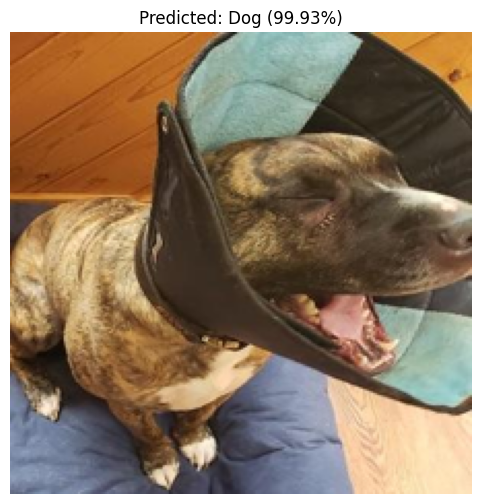

Test Loss: 0.7226, Test Accuracy: 0.6853
Prediction (0: cat, 1: dog): [[0.9992652]]
The model predicts the image is a: Dog
Prediction Probability for Dog: 99.93%


In [57]:
# Use the model to predict
prediction = model_dog.predict(img_4d)
probability = prediction[0][0] * 100  # Convert to percentage
label = "Dog" if prediction[0][0] > 0.5 else "Cat"


# Display the image with the prediction
plt.figure(figsize=(6, 6))
plt.imshow(img_4d[0])
plt.title(f"Predicted: {label} ({probability:.2f}%)")
plt.axis("off")
plt.show()

# Evaluate model performance
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

print(f"Prediction (0: cat, 1: dog): {prediction}")
print(f"The model predicts the image is a: {label}")
print(f"Prediction Probability for Dog: {probability:.2f}%")



```
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step

Test Loss: 0.6649, Test Accuracy: 0.6613
Prediction (0: cat, 1: dog): [[0.9992652]]
The model predicts the image is a: Dog
Prediction Probability for Dog: 99.93%
```

```
Reshaped image to 4D array with shape: (1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Prediction (0: cat, 1: dog): [[0.4733072]]
The model predicts the image is a: Cat
Test Loss: 0.8019, Test Accuracy: 0.7280
```

```
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Test Loss: 0.5907, Test Accuracy: 0.7520
Prediction (0: cat, 1: dog): [[0.50026464]]
The model predicts the image is a: Dog
Prediction Probability for Dog: 50.03%
```

In [58]:
# Save the plot as a file
output_path = "dog_prediction_output.png"
plt.savefig(output_path, bbox_inches='tight')  # Save the figure as a PNG file
plt.show()

print(f"The plot has been saved as {output_path}")

<Figure size 640x480 with 0 Axes>

The plot has been saved as dog_prediction_output.png



* Communicate the results of your analysis.



In [62]:
from IPython.display import display, HTML
from IPython import get_ipython

In [ ]:
from IPython.display import display, HTML
from IPython import get_ipython
import io
import sys

def capture_all_outputs():
  """Captures the printed outputs of all cells in the notebook."""
  all_outputs_html = ""

  # Get a list of input history items
  input_history = get_ipython().user_ns['_ih']

  # Iterate through input history items and capture printed output
  for code in input_history:
    if isinstance(code, str) and code.strip():  # Check if it's a code cell
      # Capture printed output using io.StringIO
      old_stdout = sys.stdout
      sys.stdout = captured_output = io.StringIO()
      try:
        exec(code)  # Execute the code
      finally:
        sys.stdout = old_stdout

      # Add captured output to HTML
      output_str = captured_output.getvalue()
      if output_str:
        all_outputs_html += f"<p>{output_str.strip()}</p>"

  return all_outputs_html

all_outputs_html = capture_all_outputs()
display(HTML(all_outputs_html))